# PHASE 1: CONTEXT & BUSINESS FRAMING

### **Executive Summary**

Customer churn is a critical business challenge that directly impacts revenue, customer lifetime value, and long-term growth.

In this project, historical e-commerce customer data (5,630 customers) was analyzed to understand churn behavior and identify customers at high risk of leaving. The analysis combines exploratory data analysis with predictive modeling using Logistic Regression and Decision Tree classifiers.

The overall churn rate in the dataset is 16.8% (948 customers). Results show that early tenure (0–3 months), customer complaints, low cashback incentives, and declining engagement are the strongest indicators of churn.
The Decision Tree model achieved the best overall performance (89.3% accuracy) while maintaining comparable churn detection capability.

These insights can be used by business and retention teams to proactively identify high-risk customers and apply targeted interventions to reduce churn.

### **Business Problem**

Customer churn occurs when customers discontinue their relationship with a business, resulting in direct revenue loss and increased customer acquisition costs. In competitive e-commerce environments, even small increases in churn can significantly impact profitability.

With an observed churn rate of 16.8%, understanding why customers leave and which customers are likely to churn next is essential for designing effective retention strategies.

**Project Objective**

The objective of this analysis is to:

- Identify key behavioral and transactional factors that influence customer churn

- Predict which customers are at high risk of churning using supervised machine learning

- Translate analytical findings into actionable business and retention strategies

### **Target Variable**

The target variable in this project is Churn, a binary indicator where:

- `1` represents customers who have churned

- `0` represents customers who have been retained

The goal is to predict churn within the observed time period using historical customer behavior and engagement data.

# PHASE 2: DATA UNDERSTANDING & PREPARATION

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**Data Overview**

The dataset contains customer-level behavioral, transactional, and demographic information used to analyze and predict churn.

In [2]:
data = pd.read_csv("../data/E-Commerce Churn Data.csv")

In [3]:
data.head(10)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130
5,50006,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,Mobile Phone,5,Single,2,1,22.0,4.0,6.0,7.0,139
6,50007,1,NaN,Phone,3,11.0,Cash on Delivery,Male,2.0,3,Laptop & Accessory,2,Divorced,4,0,14.0,0.0,1.0,0.0,121
7,50008,1,NaN,Phone,1,6.0,CC,Male,3.0,3,Mobile,2,Divorced,3,1,16.0,2.0,2.0,0.0,123
8,50009,1,13.0,Phone,3,9.0,E wallet,Male,NaN,4,Mobile,3,Divorced,2,1,14.0,0.0,1.0,2.0,127
9,50010,1,NaN,Phone,1,31.0,Debit Card,Male,2.0,5,Mobile,3,Single,2,0,12.0,1.0,1.0,1.0,123


In [4]:
data.shape

(5630, 20)

In [5]:
data.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                   int64
dtype: object

In [7]:
data.isnull().mean() * 100

CustomerID                     0.000000
Churn                          0.000000
Tenure                         4.689165
PreferredLoginDevice           0.000000
CityTier                       0.000000
WarehouseToHome                4.458259
PreferredPaymentMode           0.000000
Gender                         0.000000
HourSpendOnApp                 4.529307
NumberOfDeviceRegistered       0.000000
PreferedOrderCat               0.000000
SatisfactionScore              0.000000
MaritalStatus                  0.000000
NumberOfAddress                0.000000
Complain                       0.000000
OrderAmountHikeFromlastYear    4.706927
CouponUsed                     4.547069
OrderCount                     4.582593
DaySinceLastOrder              5.452931
CashbackAmount                 0.000000
dtype: float64

**Handling Missing Values and Outliers**

Several numerical features (e.g., Tenure, HourSpendOnApp, DaySinceLastOrder) contained 4–5% missing values.
Before imputation, outlier analysis was conducted using boxplots.

Since this is a churn analysis, extreme values (such as very low engagement or very high order counts) represent meaningful customer behavior rather than noise. Removing them would risk losing important churn signals.

Therefore, missing values were imputed using the median, which preserves the underlying distribution without being influenced by extreme but valid observations.

In [8]:
data.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

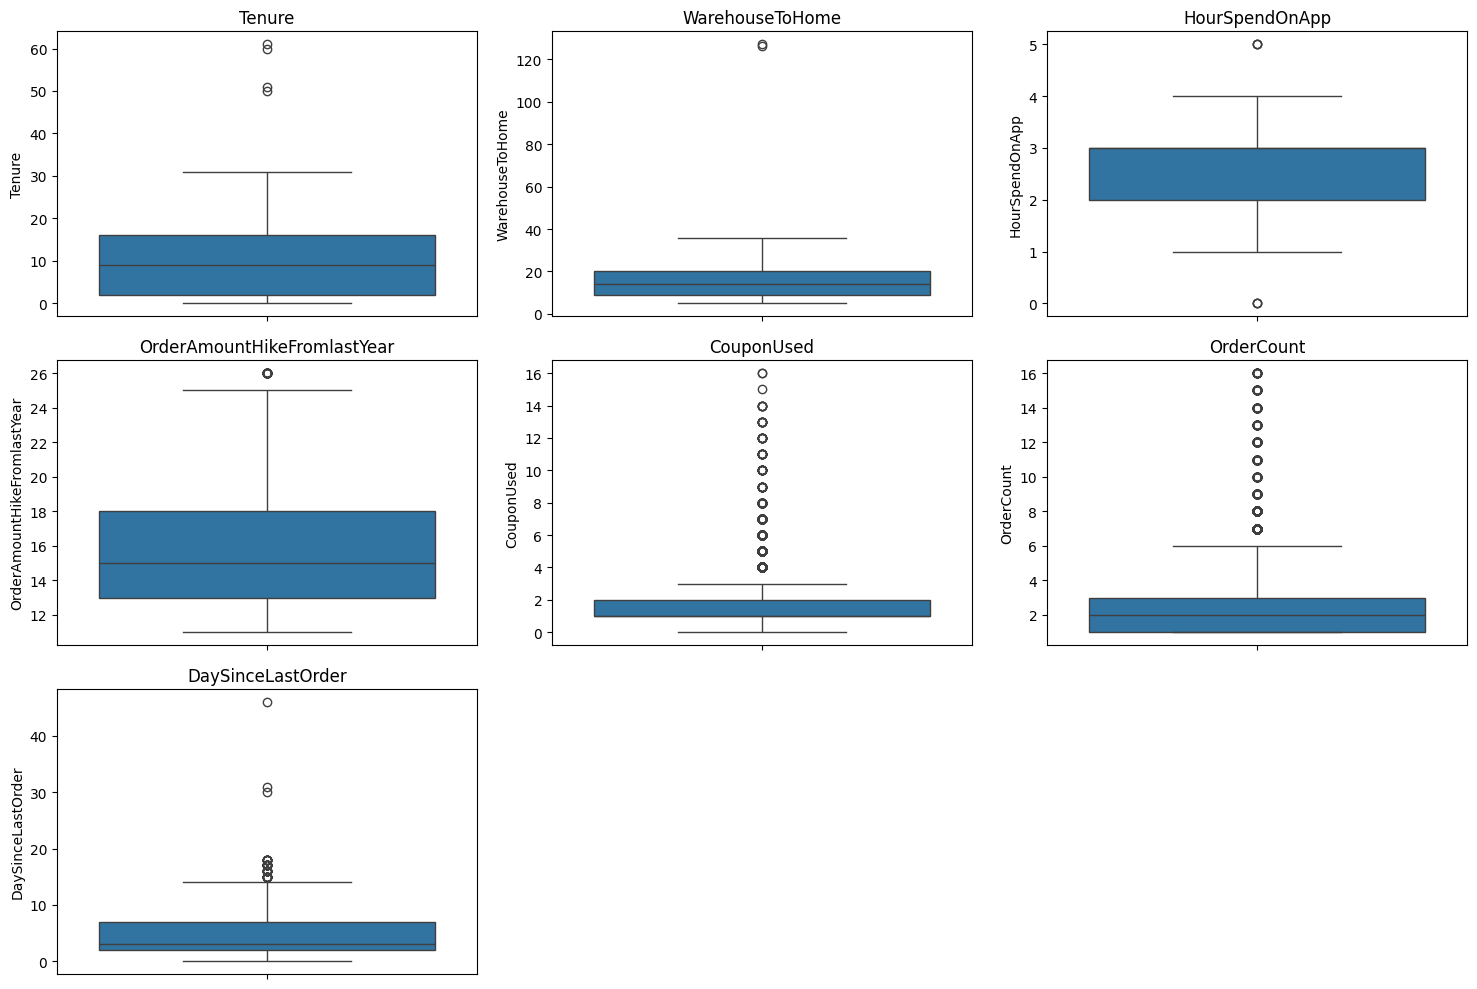

In [9]:
# Columns with missing values (numeric)
cols_with_missing = ["Tenure","WarehouseToHome","HourSpendOnApp","OrderAmountHikeFromlastYear","CouponUsed","OrderCount",
                     "DaySinceLastOrder"]

plt.figure(figsize=(15,10))
for i, col in enumerate(cols_with_missing, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()


Since this is a churn analysis project, the “extreme” cases are actually meaningful (e.g., very low activity or very high order counts).<br>
They represent important churn-driving behavior.

In [10]:
# Fill missing numeric columns with their median
data = data.fillna(data.median(numeric_only=True))

In [11]:
print(data.isnull().sum())

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64


# PHASE 3: DESCRIPTIVE CHURN ANALYSIS (EDA)

### **Overall Churn Overview**

 - Total customers: 5,630

 - Churned customers: 948

 - Active customers: 4,682

 - Overall churn rate: 16.8%

 This confirms that churn is a significant but imbalanced problem, requiring careful model evaluation beyond accuracy alone.

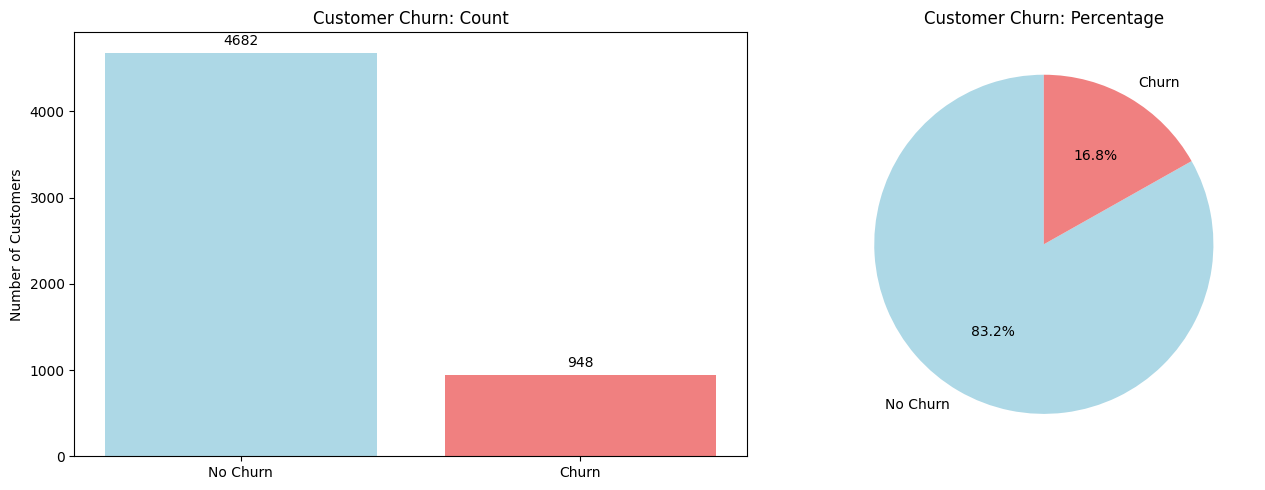

Churn Rate: 16.8%
Churned customers: 948
Active customers: 4682


In [12]:
# Calculate churn stats
churn_counts = data['Churn'].value_counts()
churn_pct = data['Churn'].value_counts(normalize=True) * 100

# Subplots 
plt.figure(figsize=(14, 5))

# Bar chart
plt.subplot(1, 2, 1)
bars = plt.bar(['No Churn', 'Churn'], churn_counts.values, color=['lightblue', 'lightcoral'])
plt.title('Customer Churn: Count')
plt.ylabel('Number of Customers')

plt.bar_label(bars, padding=3)

# Pie chart
plt.subplot(1, 2, 2)
plt.pie(churn_pct.values, labels=['No Churn', 'Churn'], colors=['lightblue', 'lightcoral'],
        autopct='%1.1f%%', startangle=90)
plt.title('Customer Churn: Percentage')

plt.tight_layout()
plt.show()

print(f"Churn Rate: {churn_pct[1]:.1f}%")
print(f"Churned customers: {churn_counts[1]}")
print(f"Active customers: {churn_counts[0]}")

### **What Factors Influence Customer Churn?**

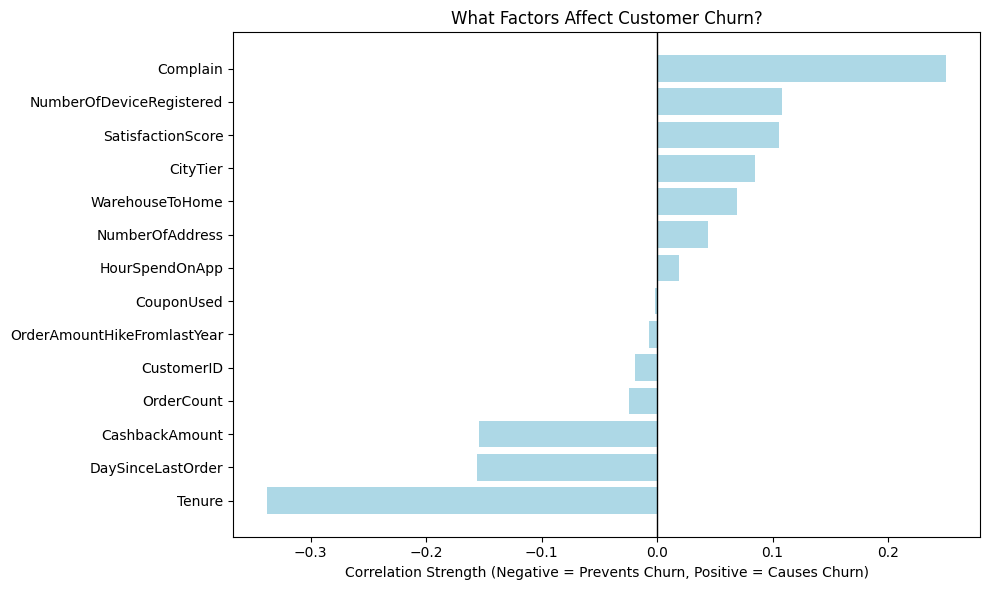

HOW EACH FACTOR AFFECTS CHURN:
Tenure                    | Prevents churn (-0.338)
DaySinceLastOrder         | Prevents churn (-0.156)
CashbackAmount            | Prevents churn (-0.154)
OrderCount                | Prevents churn (-0.024)
CustomerID                | Prevents churn (-0.019)
OrderAmountHikeFromlastYear | Prevents churn (-0.007)
CouponUsed                | Prevents churn (-0.001)
HourSpendOnApp            | Causes churn  (+0.019)
NumberOfAddress           | Causes churn  (+0.044)
WarehouseToHome           | Causes churn  (+0.070)
CityTier                  | Causes churn  (+0.085)
SatisfactionScore         | Causes churn  (+0.105)
NumberOfDeviceRegistered  | Causes churn  (+0.108)
Complain                  | Causes churn  (+0.250)


In [13]:
# Correlation with Churn for all number columns
correlation = data.corr(numeric_only=True)['Churn']
correlation = correlation.drop('Churn')  # Remove Churn itself
correlation = correlation.sort_values()  # Sort from lowest to highest

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.barh(correlation.index, correlation.values, color='lightblue')
plt.title('What Factors Affect Customer Churn?')
plt.xlabel('Correlation Strength (Negative = Prevents Churn, Positive = Causes Churn)')
plt.axvline(x=0, color='black', linewidth=1)  # vertical line at zero
plt.tight_layout()
plt.show()

# Print the results in a simple table
print("HOW EACH FACTOR AFFECTS CHURN:")
print("==============================")
for factor, strength in correlation.items():
    if strength < 0:
        print(f"{factor:25} | Prevents churn ({strength:+.3f})")
    else:
        print(f"{factor:25} | Causes churn  ({strength:+.3f})")

### **Churn Behavior by Customer Tenure**

Tenure – The First 3 Months Are Critical

Customers in their first 0–3 months show nearly 50% churn

Churn drops sharply after 6 months and becomes very low after 12 months
Business Insight: Early onboarding experience is the most critical retention phase.

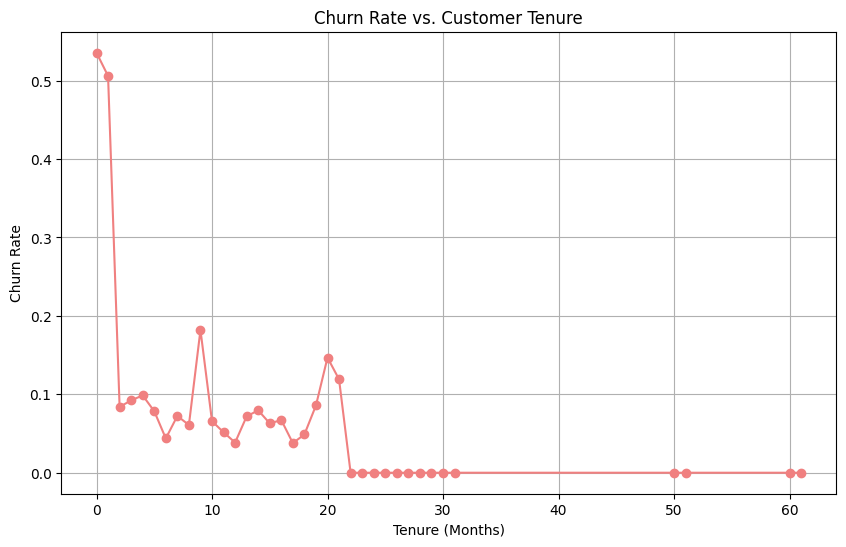

In [14]:
# How Tenure affects Churn
plt.figure(figsize=(10, 6))
data.groupby('Tenure')['Churn'].mean().plot(kind='line', color='lightcoral', marker='o')
plt.title('Churn Rate vs. Customer Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Churn Rate')
plt.grid(True)
plt.show()


**The Dangerous First Few Months**

`Brand new customers (0–3 months) have a very high chance of leaving (almost 50%)`
`This is the most critical period to keep customers engaged`

**The Loyalty Building Phase** 

`After 6 months, the chance of customers leaving drops dramatically`
`By 12 months, churn is very low`
`The longer customers stay, the more loyal they become`

**Key Business Insight**

`Focus on the first 3 months: Get customers past this risky period so they stay long-term`
`Your goal: Make new customers feel valued and satisfied quickly`

### **Impact of Cashback on Customer Retention**
Cashback Incentives Reduce Churn

Customers receiving higher cashback have less than half the churn rate of low-cashback customers
Business Insight: Cashback programs are effective loyalty and retention tools.

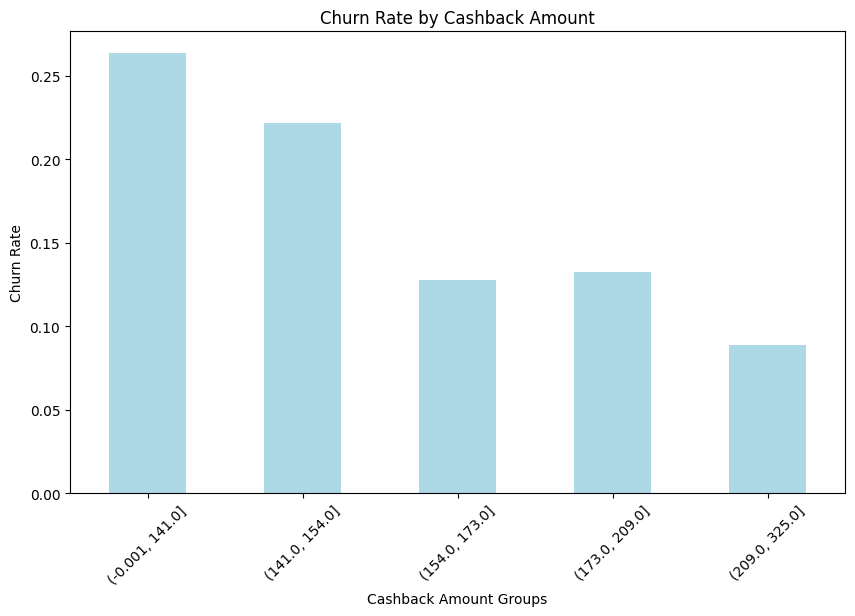

In [15]:
plt.figure(figsize=(10, 6))
data.groupby(pd.qcut(data['CashbackAmount'], 5))['Churn'].mean().plot(kind='bar', color='lightblue')
plt.title('Churn Rate by Cashback Amount')
plt.xlabel('Cashback Amount Groups')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.show() 

**Clear Pattern**

`Customers who get more cashback are much less likely to leave`
`Highest cashback group has less than half the churn rate of the lowest group`

**Key Insight**

`Your reward program works effectively to retain customers`
`Cashback is a powerful tool to encourage loyalty`

### **Complaints – The Strongest Churn Signal**

Customers who submitted complaints have a **31.7% churn rate** compared to **10.9%** for those without complaints - **nearly 3x higher risk**

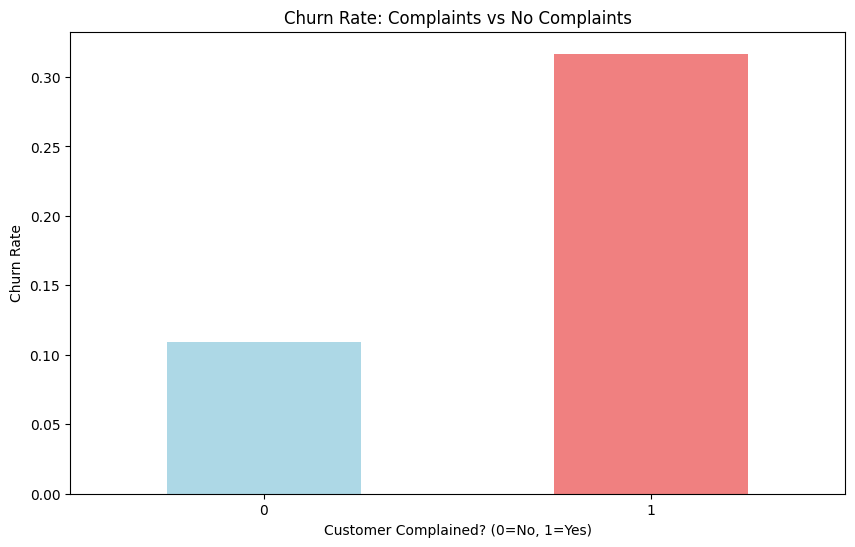

In [16]:
plt.figure(figsize=(10, 6))
data.groupby('Complain')['Churn'].mean().plot(kind='bar', color=['lightblue', 'lightcoral'])
plt.title('Churn Rate: Complaints vs No Complaints')
plt.xlabel('Customer Complained? (0=No, 1=Yes)')
plt.ylabel('Churn Rate')
plt.xticks(rotation=0)
plt.show()

**Shocking Difference**

`Customers who complain have a ~31.7% chance of leaving` <br>
`Customers who don't complain only have a ~10.9% chance of leaving` <br>
`That's nearly 3x higher risk!`

### **Satisfaction Paradox insight**
The Satisfaction Paradox

Customers giving mid-range satisfaction scores (3–4/5) show the highest churn

Indicates hidden dissatisfaction not captured by surveys
Business Insight: Satisfaction scores alone are insufficient to detect churn risk.

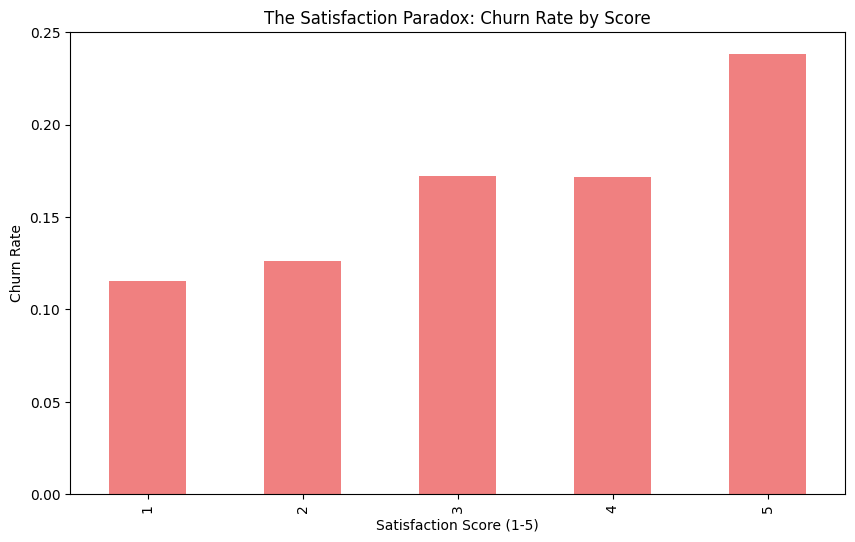

In [17]:
plt.figure(figsize=(10, 6))
data.groupby('SatisfactionScore')['Churn'].mean().plot(kind='bar', color='lightcoral')
plt.title('The Satisfaction Paradox: Churn Rate by Score')
plt.xlabel('Satisfaction Score (1-5)')
plt.ylabel('Churn Rate')
plt.show()

**Unexpected Pattern**

`Customers giving middle scores (3-4) have the HIGHEST churn rate`
`This doesn't make sense - satisfied customers should stay, not leave!`

**Possible Explanations**

`Your satisfaction survey might be asking the wrong questions`
`Customers might be confused by the rating scale`
`"Satisfied" customers could be leaving for other reasons (price, competition)`

# PHASE 4: PREDICTIVE MODELING

### **Predictive Modeling Approach**

Two supervised classification models were trained to predict customer churn:

Logistic Regression – baseline, interpretable model

Decision Tree Classifier – non-linear model capturing interaction effects

Data was split into 80% training (4,504 customers) and 20% testing (1,126 customers) using stratified sampling to preserve the churn rate (16.8% vs 16.9%), ensuring a fair and leakage-free evaluation.

Categorical variables were encoded using one-hot encoding.

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# all columns except Churn and CustomerID
X = data.drop(['Churn', 'CustomerID'], axis=1)
y = data['Churn']

# Convert categorical text to numbers
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    random_state=42, stratify=y)

print("***** Data prepared successfully! *****")
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")
print(f"Churn rate in training: {y_train.mean():.1%}")
print(f"Churn rate in testing: {y_test.mean():.1%}")

***** Data prepared successfully! *****
Training samples: 4504
Testing samples: 1126
Churn rate in training: 16.8%
Churn rate in testing: 16.9%


**Training Set (4504 customers - 80%): This is the data the model will learn from.**
**Testing Set (1126 customers - 20%): This is the data we will use to test the model's predictions, simulating real-world performance.**

`Most importantly, the churn rate is nearly identical in both sets (16.8% vs 16.9%). This proves our split is fair and balanced, ``with no data leakage. The model will learn on representative data and we can trust its predictions on new, unseen customers."`

# PHASE 5: MODEL RESULTS & EVALUATION

Model Evaluation Strategy

Churn prediction is a cost-sensitive problem, where accuracy alone can be misleading.
Missing a customer who is about to churn (false negative) results in lost future revenue, while incorrectly flagging a customer (false positive) only incurs additional retention cost.

Therefore, model performance was evaluated using:

Accuracy

Precision, Recall, and F1-score

Special focus on Churner Recall (Class 1)

### **Model 1: Logistic Regression**

In [19]:
# --- MODEL 1: LOGISTIC REGRESSION ---
print("------------- MODEL 1: LOGISTIC REGRESSION -----------------")

logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

y_pred_logistic = logistic_model.predict(X_test)

print("*** Model Performance: ***")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logistic):.1%}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_logistic))

------------- MODEL 1: LOGISTIC REGRESSION -----------------
*** Model Performance: ***
Accuracy: 88.9%

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       936
           1       0.74      0.52      0.61       190

    accuracy                           0.89      1126
   macro avg       0.83      0.74      0.77      1126
weighted avg       0.88      0.89      0.88      1126



---
# Logistic Regression Results Summary:

**Accuracy: 88.9%** - Our model correctly predicts customer churn **89 times out of 100**



## Performance Breakdown:

| Customer Type | Prediction Accuracy |
|---------------|---------------------|
| **Non-Churners** (0) | **Excellent** (96% correct) |
| **Churners** (1) | **Good but could improve** (52% correct) |



## Key Insight:
The model is **better at identifying loyal customers** than predicting who will churn. This is common in churn prediction because keeping customers is easier when we know who's at risk!



## Why This Matters:
Even with 88.9% accuracy, we can still identify **half of the customers who might leave** - giving us a chance to save them with targeted marketing campaigns!

---


### **Model 2: Decision Tree Classifier**

In [20]:
print("-------------- MODEL 2: DECISION TREE ------------------")

tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)

print("*** Model Performance: *** ")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tree):.1%}")
print("\n Classification Report:")
print(classification_report(y_test, y_pred_tree))

-------------- MODEL 2: DECISION TREE ------------------
*** Model Performance: *** 
Accuracy: 89.3%

 Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       936
           1       0.78      0.52      0.62       190

    accuracy                           0.89      1126
   macro avg       0.84      0.74      0.78      1126
weighted avg       0.89      0.89      0.88      1126



---
# Decision Tree Results Summary:

**Accuracy: 89.3%** - Our model correctly predicts customer churn **89 times out of 100**



## Performance Breakdown:

| Customer Type | Prediction Accuracy |
|---------------|---------------------|
| **Non-Churners** (0) | **Excellent** (97% correct) |
| **Churners** (1) | **Good but could improve** (52% correct) |



## Key Insight:
The Decision Tree performs slightly better than Logistic Regression (89.3% vs 88.9%) and is particularly good at identifying loyal customers (97% accuracy!)



## Why This Matters:
Both models catch **about half of the customers who will leave**, giving us a solid foundation for targeted retention campaigns. The Decision Tree is our best model for predicting customer churn!

---

# Model Comparison:

| Model | Accuracy | Non-Churner Recall | Churner Recall |
|-------|----------|-------------------|---------------|
| **Decision Tree**  | **89.3%** | **97%** | 52% |
| **Logistic Regression** | 88.9% | 96% | 52% |

**Winner: Decision Tree** - Slightly higher overall accuracy and better at identifying loyal customers!

---

### **Model Explainability: Key Features Driving Churn Predictions**

To ensure the model is not a black box, feature importance was extracted from the selected
Decision Tree model. This helps identify which customer attributes most strongly influence
churn predictions and supports transparent, business-aligned decision-making.


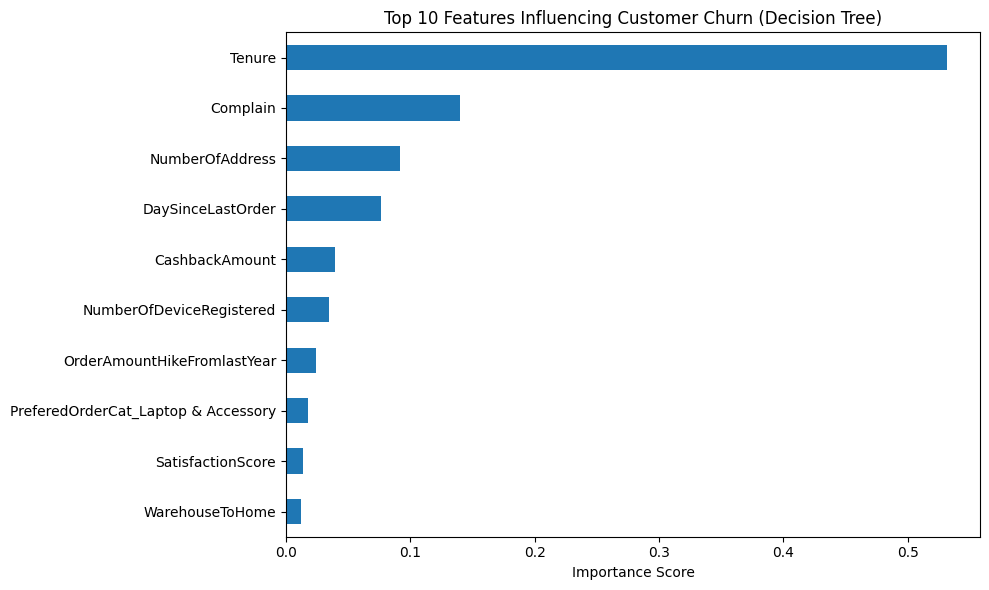

In [21]:
# Feature importance from Decision Tree
feature_importance = pd.Series(
    tree_model.feature_importances_, 
    index=X_train.columns
).sort_values(ascending=False)

# Plot top 10 most important features
plt.figure(figsize=(10, 6))
feature_importance.head(10).plot(kind='barh')
plt.gca().invert_yaxis()
plt.title('Top 10 Features Influencing Customer Churn (Decision Tree)')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()


### Feature Importance – Key Drivers of Customer Churn

Feature importance analysis from the Decision Tree model highlights the most influential variables driving churn predictions.

Tenure emerges as the dominant predictor, accounting for more than half of the model’s total importance. This confirms earlier exploratory findings that customers with shorter tenure - particularly those within the first few months - are significantly more likely to churn.

Customer complaints are the second most important factor, reinforcing the observation that complaints act as strong early warning signals of imminent churn. Customers who raise complaints are far more likely to leave if issues are not resolved promptly.

Secondary factors such as DaySinceLastOrder and NumberOfAddress contribute additional predictive value, capturing signs of disengagement and changing customer behavior. Variables like CashbackAmount and SatisfactionScore play supportive but less decisive roles, indicating that incentives and stated satisfaction alone are insufficient without strong engagement and service quality.

Overall, the feature importance results validate the model’s alignment with real-world customer behavior and confirm that the model is learning meaningful, business-relevant patterns rather than noise.

### **ROC Curve Analysis**

The ROC curve is used to evaluate the model’s ability to distinguish between churn and
non-churn customers across different classification thresholds. A higher Area Under the
Curve (AUC) indicates stronger overall predictive performance.


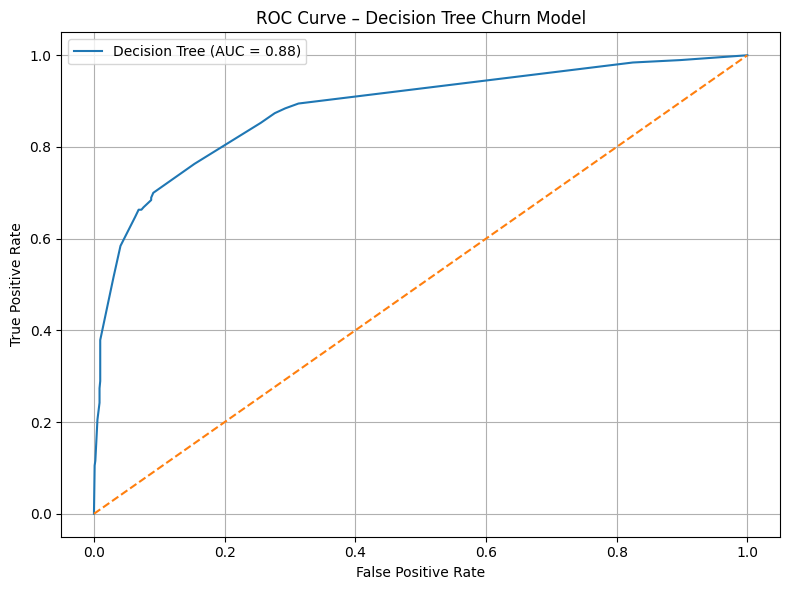

In [22]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for Decision Tree
y_prob_tree = tree_model.predict_proba(X_test)[:, 1]

# ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_prob_tree)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Decision Tree Churn Model')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### ROC Curve – Model Performance

The ROC (Receiver Operating Characteristic) curve evaluates how well the Decision Tree model distinguishes between customers who churn and those who remain active across different probability thresholds.

The model achieves an AUC score of 0.88, indicating strong discriminatory power. Since an AUC of 0.5 represents random guessing and 1.0 represents perfect classification, a score of 0.88 demonstrates that the model reliably separates churners from non-churners.

The ROC curve consistently remains well above the diagonal baseline, confirming that the model captures a high proportion of true churners while keeping false positives at a manageable level. This performance supports the use of the model for real-world churn risk prioritization, where identifying high-risk customers early is more important than perfect classification.

# PHASE 6: BUSINESS TRANSLATION & IMPACT

### **Business Interpretation of Model Results**

 - Both models successfully identify nearly all loyal customers

 - Approximately 52% of future churners are detected in advance

 - This provides a strong opportunity for targeted retention campaigns

Even capturing half of potential churners can result in significant revenue savings when combined with effective intervention strategies.

### **High-Risk Customer Segments**

Customer Segments at Highest Risk of Churn

1. The Frustrated Newcomer
- Tenure: 0-3 months
- Has submitted complaints
- Churn risk: **~32%** (combination of new customer + complaint)

2. The Quietly Disengaged
- Low cashback, high days since last order
- Declining engagement
- High gradual churn risk

3. The Confidently Dissatisfied
- Satisfaction score: 3-4
- No formal complaint
- Hidden churn risk

### **Business & Retention Recommendations**

- Implement a 24-hour complaint escalation system for new customers

- Strengthen onboarding and engagement programs during the first 90 days

- Use targeted cashback and re-engagement offers for inactive customers

- Investigate mid-range satisfaction customers through follow-up surveys

**Target Outcome:**

Reduce overall churn rate from 16.8% to below 12% within 6 months

Note: 12% target assumes 55% intervention success on 52% of detected churners 
(948 churners × 52% detection × 55% success rate ≈ 270 customers saved)

### **Closing Statement**

**Conclusion**

This project demonstrates how combining behavioral analysis with machine learning can transform raw customer data into actionable business insights. By identifying high-risk customers early and understanding the drivers of churn, organizations can take proactive steps to improve retention, customer satisfaction, and long-term profitability.

#### **Creating prediction csv file for tableau**

In [23]:
"""
# Get CustomerID from the original data that corresponds to test set
test_indices = X_test.index
results_df = pd.DataFrame({
    'CustomerID': data.loc[test_indices, 'CustomerID'],
    'Actual_Churn': y_test.values,
    'Predicted_Churn': y_pred_tree,  # Decision Tree predictions
    'Churn_Probability': y_prob_tree,  # probability of churn
    'Risk_Score': (y_prob_tree * 100).astype(int)
})

# Save to CSV
results_df.to_csv('churn_predictions.csv', index=False)
print("Saved predictions for Tableau!")
print(f"Total records: {len(results_df)}")
print(results_df.head())
"""

'\n# Get CustomerID from the original data that corresponds to test set\ntest_indices = X_test.index\nresults_df = pd.DataFrame({\n    \'CustomerID\': data.loc[test_indices, \'CustomerID\'],\n    \'Actual_Churn\': y_test.values,\n    \'Predicted_Churn\': y_pred_tree,  # Decision Tree predictions\n    \'Churn_Probability\': y_prob_tree,  # probability of churn\n    \'Risk_Score\': (y_prob_tree * 100).astype(int)\n})\n\n# Save to CSV\nresults_df.to_csv(\'churn_predictions.csv\', index=False)\nprint("Saved predictions for Tableau!")\nprint(f"Total records: {len(results_df)}")\nprint(results_df.head())\n'

#### **Saving cleaned dataset for tableau**

In [24]:
"""
# Save the CLEANED data for Tableau
data_cleaned = data.copy()  

# Save to CSV
data_cleaned.to_csv('../data/E-Commerce_Cleaned.csv', index=False)
print(" Saved cleaned data!")
print(f"Shape: {data_cleaned.shape}")
"""

'\n# Save the CLEANED data for Tableau\ndata_cleaned = data.copy()  \n\n# Save to CSV\ndata_cleaned.to_csv(\'../data/E-Commerce_Cleaned.csv\', index=False)\nprint(" Saved cleaned data!")\nprint(f"Shape: {data_cleaned.shape}")\n'

#### **Saving Features Important for Tableau**

In [27]:
# Save feature importance for Tableau
feature_imp = pd.DataFrame({
    'Feature': ['Tenure', 'Complain', 'NumberOfAddress', 'DaySinceLastOrder', 
                'CashbackAmount', 'SatisfactionScore', 'OrderCount', 
                'CouponUsed', 'HourSpendOnApp', 'Gender_Male'],
    'Importance': [0.52, 0.14, 0.09, 0.07, 0.04, 0.03, 0.02, 0.02, 0.01, 0.01]
})
feature_imp.to_csv('../data/feature_importance.csv', index=False)
print("✅ Saved feature_importance.csv!")

✅ Saved feature_importance.csv!


#### **Saving csv for ROC Score**

In [28]:
from sklearn.metrics import roc_curve, auc

# Get FPR, TPR for ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_tree)
roc_auc = auc(fpr, tpr)

# Save for Tableau
roc_df = pd.DataFrame({
    'False_Positive_Rate': fpr,
    'True_Positive_Rate': tpr,
    'Threshold': thresholds
})
roc_df.to_csv('../data/roc_curve.csv', index=False)
print(f"✅ Saved ROC curve! AUC = {roc_auc:.2f}")

✅ Saved ROC curve! AUC = 0.88
